In [ ]:
import pandas as pd

In [ ]:
survey_raw_df = pd.read_csv('survey_results_public.csv')

In [ ]:
schema_fname = 'survey_results_schema.csv'
pd.read_csv(schema_fname)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [ ]:
pd.read_csv(schema_fname, index_col='Column').loc['Respondent']

,Respondent
QuestionText,Randomized respondent ID number (not in order ...


In [ ]:
schema_raw = pd.read_csv(schema_fname,index_col = 'Column').QuestionText

Although the survey offers extensive details, we streamline our EDA to focus on three key aspects for the sake of clarity and simplicity. And these are:
1. Demographics of the survey respondents
2. Distribution of Programming skills
3. Employment related information and opinions


In [ ]:
# To focus on the 3 key areas we select a subset of the relevant data for our analysis
selected_coloumn = [
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    'UndergradMajor',
    'Hobbyist',
    'Age1stCode',
    'YearsCode',
    'YearsCodePro',
    'LanguageWorkedWith',
    'LanguageDesireNextYear',
    'NEWLearn',
    'NEWStuck',
    'Employment',
    'DevType',
    'WorkWeekHrs',
    'JobSat',
    'JobFactors',
    'NEWOvertime',
    'NEWEdImpt'
]

In [ ]:
# Creating a new data frame and schema to copy the selected columns so that any changes made are not made to the original data set
survey_df = survey_raw_df[selected_coloumn].copy()
schema = schema_raw[selected_coloumn]

In [ ]:
# To get an overview of the data and determine the data types
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3088 entries, 0 to 3087
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 3088 non-null   object 
 1   Age                     2709 non-null   float64
 2   Gender                  2940 non-null   object 
 3   EdLevel                 3018 non-null   object 
 4   UndergradMajor          2752 non-null   object 
 5   Hobbyist                3088 non-null   object 
 6   Age1stCode              3065 non-null   object 
 7   YearsCode               3063 non-null   object 
 8   YearsCodePro            2572 non-null   object 
 9   LanguageWorkedWith      3054 non-null   object 
 10  LanguageDesireNextYear  2861 non-null   object 
 11  NEWLearn                2974 non-null   object 
 12  NEWStuck                3042 non-null   object 
 13  Employment              3074 non-null   object 
 14  DevType                 2705 non-null   

In [ ]:
#changing data types wherever necessary
survey_df['Age1stCode'] = pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

In [ ]:
#some stats for the data
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,2709.000000,3046.000000,3024.000000,2498.000000,2446.000000
mean,32.781211,14.950098,15.247024,10.503603,40.923140
std,10.557782,5.315974,10.682940,8.726303,13.413436
min,11.000000,5.000000,1.000000,1.000000,4.000000
25%,25.000000,12.000000,7.000000,4.000000,40.000000
50%,31.000000,14.000000,12.000000,8.000000,40.000000
75%,38.000000,17.000000,21.000000,15.000000,42.000000
max,99.000000,56.000000,50.000000,50.000000,375.000000


In [ ]:
import numpy as np

In [ ]:
# We can see some discrepancies with the data, to sort that out we drop a few rows from the data
# for age
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace= True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace= True)
#for workweeks hrs
survey_df.drop(survey_df[survey_df.WorkWeekHrs>140].index, inplace= True)
# there are data points where people have selected more than 1 gender, to make our analysis simple we'll drop the columns where this is the case
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)),np.nan,inplace = True)

STARTING WITH THE EDA

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
survey_df.Country.value_counts()

,count
Country,
United States,1547
Canada,288
United Kingdom,166
Germany,124
India,117
...,...
Haiti,1
Sudan,1
Honduras,1


In [ ]:
top_countries = survey_df.Country.value_counts().head(15)
top_countries

,count
Country,
United States,1547
Canada,288
United Kingdom,166
Germany,124
India,117
Brazil,71
France,53
Netherlands,37
Italy,33


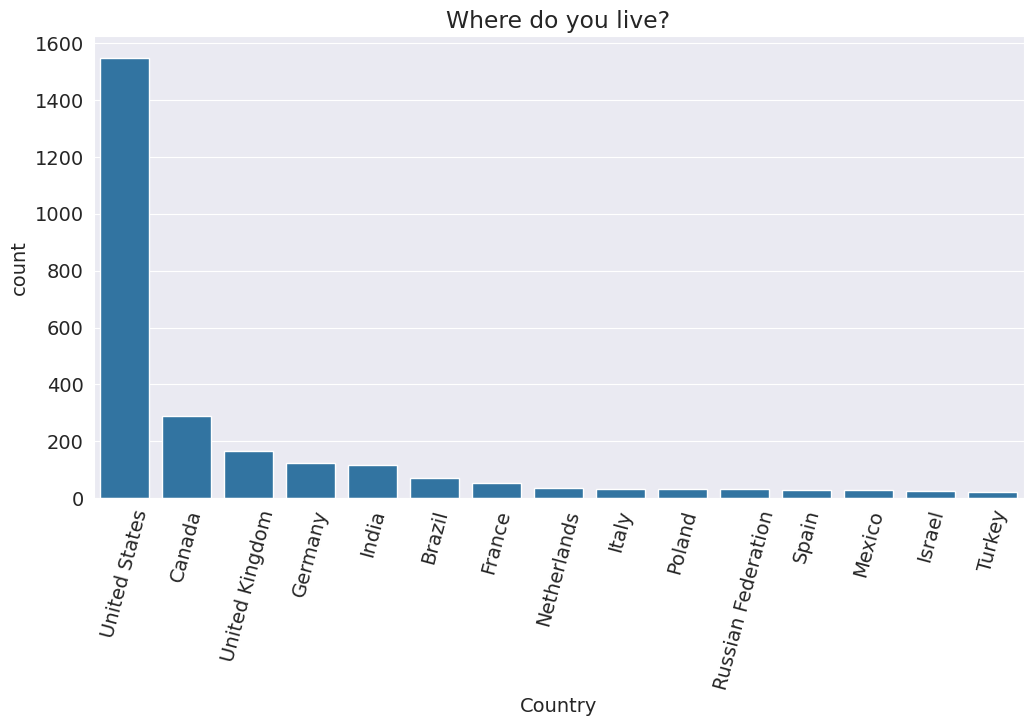

In [ ]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=75)
plt.title(schema.Country)
sns.barplot(x=top_countries.index, y=top_countries);

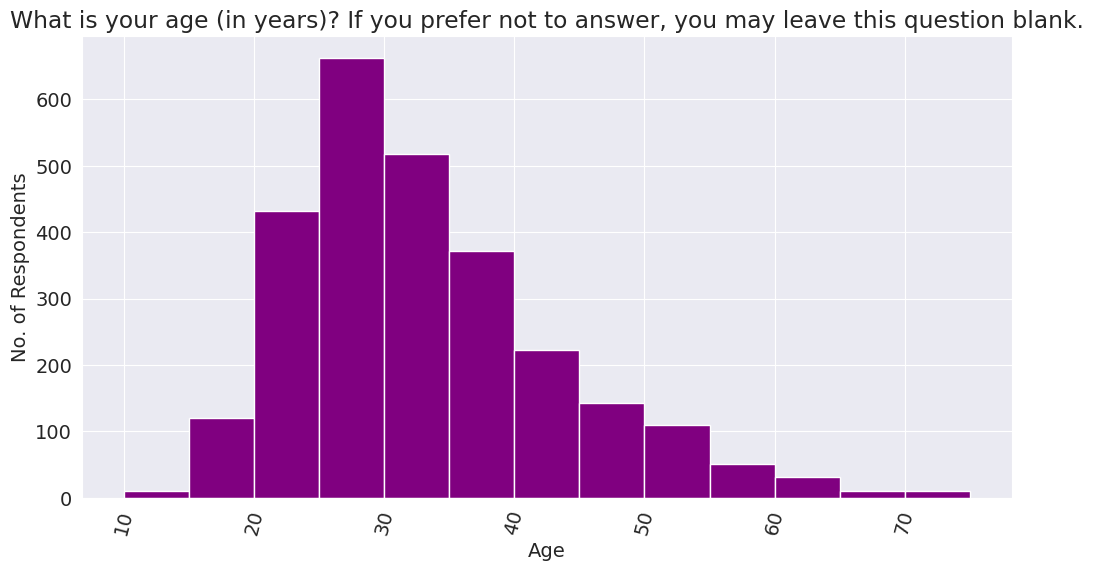

In [ ]:
plt.figure(figsize = (12,6))
plt.title(schema.Age)
plt.xticks(rotation=75)
plt.xlabel('Age')
plt.ylabel('No. of Respondents')
#in the bins we have passed 3 arguments which are the min value, max value and the difference between 2 consecutive plotted values
plt.hist(survey_df.Age, bins=np.arange(10,80,5),color = 'purple');


In [ ]:
gender_counts = survey_df.Gender.value_counts()
gender_counts

,count
Gender,
Man,2713
Woman,192
"Non-binary, genderqueer, or gender non-conforming",22


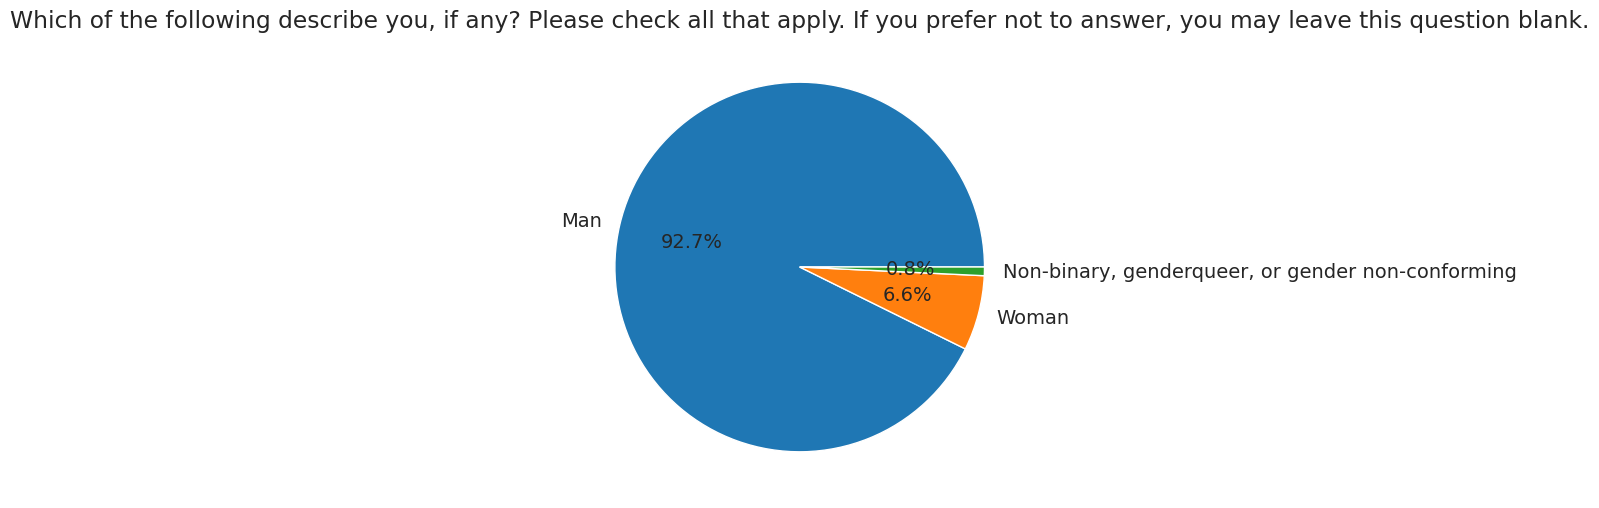

In [ ]:
# pie chart to visualize the gender distribution
plt.figure(figsize=(12,6))
plt.title(schema.Gender)
plt.pie(gender_counts,labels = gender_counts.index,autopct = '%1.1f%%');

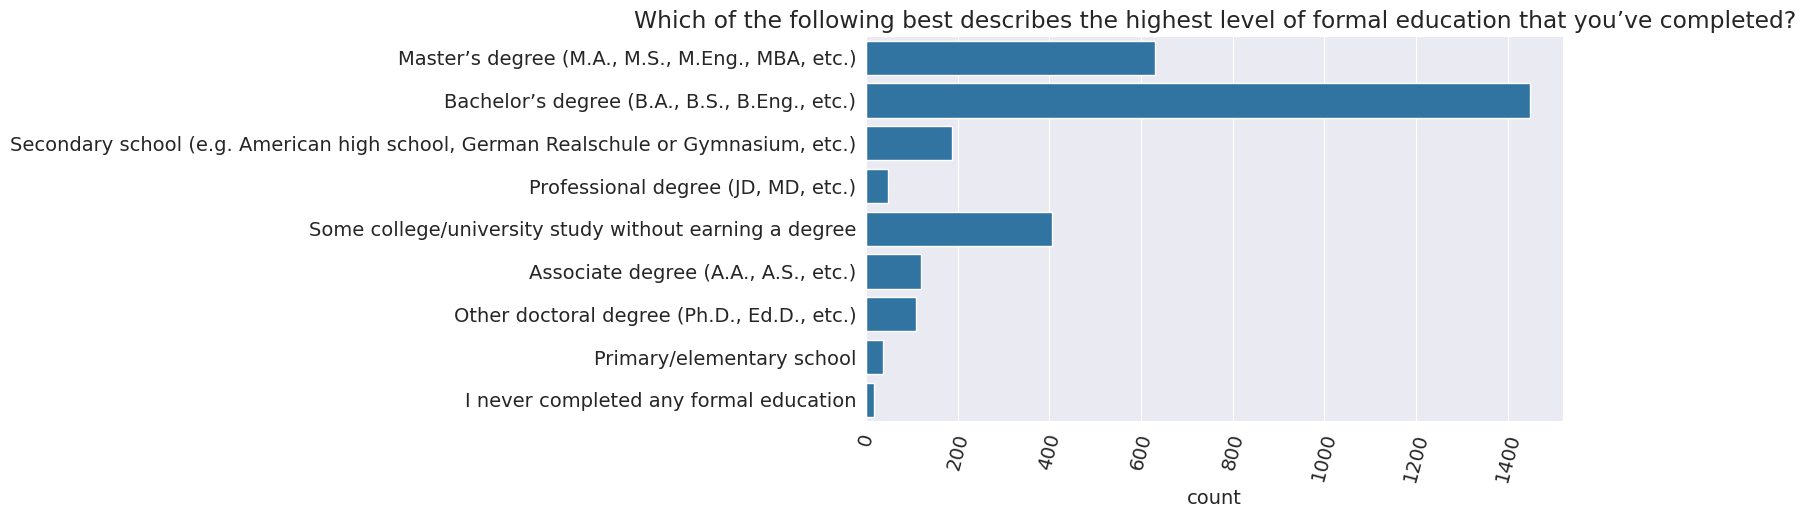

In [ ]:
#visualizing the education level
sns.countplot(y=survey_df.EdLevel)
plt.xticks(rotation = 75)
plt.title(schema.EdLevel)
plt.ylabel(None);

In [ ]:
schema.UndergradMajor

'What was your primary field of study?'

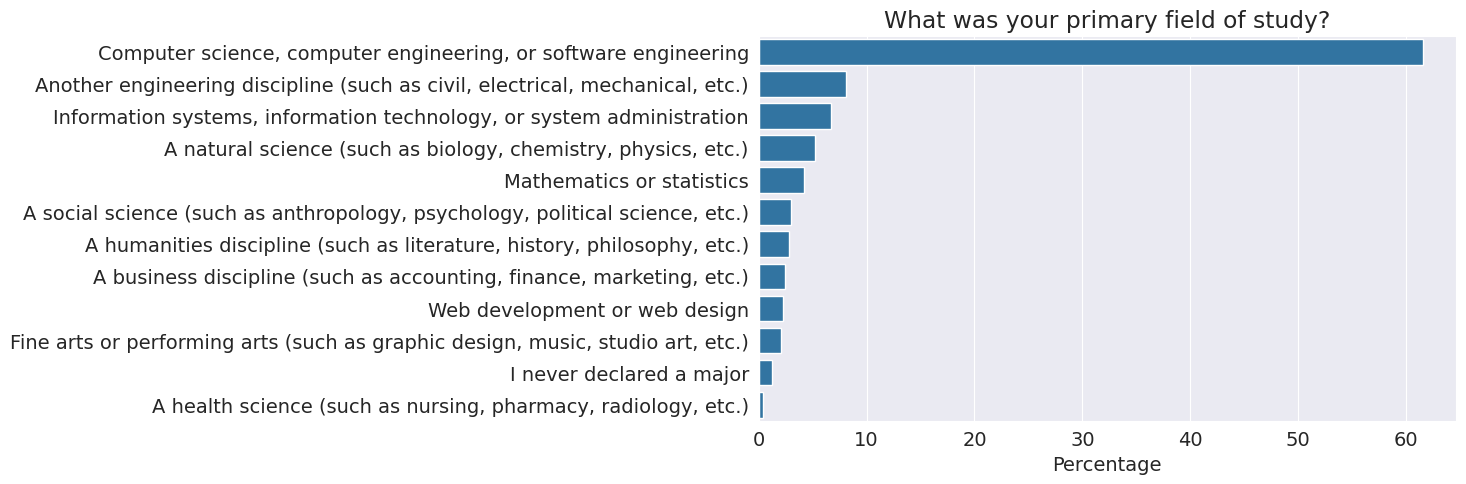

In [ ]:
undergrad_pct = survey_df.UndergradMajor.value_counts()*100 / survey_df.UndergradMajor.count()
sns.barplot(x=undergrad_pct,y=undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.xlabel('Percentage')
plt.ylabel(None);

EDA BASED ON EMPLOYEMENT

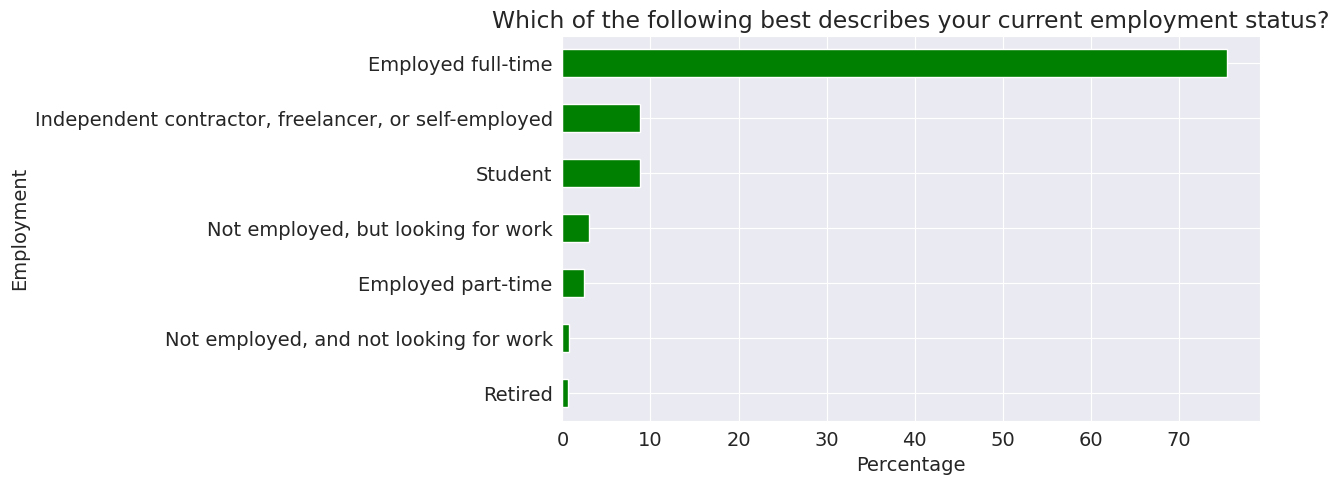

In [ ]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind='barh', color='g')
plt.title(schema.Employment)
plt.xlabel('Percentage');

In [ ]:
survey_df.DevType.value_counts()

,count
DevType,
"Developer, full-stack",269
"Developer, back-end",131
"Developer, back-end;Developer, front-end;Developer, full-stack",111
"Developer, back-end;Developer, full-stack",75
"Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack",61
...,...
"Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Developer, game or graphics;Developer, QA or test;DevOps specialist;Engineer, site reliability",1
"Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Product manager",1
"Academic researcher;Data or business analyst;Data scientist or machine learning specialist;Developer, back-end;Developer, desktop or enterprise applications;Developer, full-stack;Developer, QA or test;DevOps specialist;Educator;Engineering manager;Senior executive/VP",1


In [ ]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = []
    # Iterate over the column using items() instead of iteritems()
    for idx, value  in col_series[col_series.notnull()].items():
        # Break each value into list of options
        for option in value.split(';'):
            # Add the option as a column to result
            if not option in result_df.columns:
                options.append(option)
                result_df[option] = False
            # Mark the value in the option column as True
            result_df.at[idx, option] = True
    return result_df[options]

In [ ]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [ ]:
dev_type_df

,"Developer, desktop or enterprise applications","Developer, full-stack","Developer, mobile",Designer,"Developer, front-end","Developer, back-end","Developer, QA or test",DevOps specialist,"Developer, game or graphics",Database administrator,...,System administrator,Engineering manager,Product manager,Data or business analyst,Academic researcher,Data scientist or machine learning specialist,Scientist,Senior executive/VP,"Engineer, site reliability",Marketing or sales professional
0,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3084,False,False,False,False,False,True,False,True,False,False,...,True,False,False,False,False,True,False,False,False,False
3085,False,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3086,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dev_type_totals = dev_type_df.sum().sort_values(ascending=False)
dev_type_totals

,0
"Developer, full-stack",1597
"Developer, back-end",1448
"Developer, front-end",1003
"Developer, desktop or enterprise applications",691
"Developer, mobile",458
DevOps specialist,366
Database administrator,359
System administrator,326
Designer,302
"Developer, embedded applications or devices",234


Q: Which were the most popular programming languages in 2020?
To answer, this we can use the LanguageWorkedWith column.
Thing to consider: Similar to DevType respondents were allowed to choose multiple options here.

In [ ]:
survey_df.LanguageWorkedWith

,LanguageWorkedWith
0,C#;HTML/CSS;JavaScript
1,JavaScript;Swift
2,Objective-C;Python;Swift
3,NaN
4,HTML/CSS;Ruby;SQL
...,...
3083,HTML/CSS;Java;JavaScript;Python;Ruby;SQL
3084,JavaScript;Python;R;SQL
3085,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Pyth...
3086,Go;SQL;TypeScript


In [ ]:
languages_worked_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [ ]:
languages_worked_df

,C#,HTML/CSS,JavaScript,Swift,Objective-C,Python,Ruby,SQL,Java,PHP,...,VBA,Perl,Scala,C++,Go,Haskell,Rust,Dart,Julia,Assembly
0,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,False,True,True,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
3084,False,False,True,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3085,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3086,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [ ]:
languages_worked_percentages = languages_worked_df.mean().sort_values(ascending=False) * 100
languages_worked_percentages

,0
JavaScript,70.090732
HTML/CSS,64.549579
SQL,57.939080
Python,43.810758
Bash/Shell/PowerShell,38.172391
Java,37.427090
C#,35.904083
TypeScript,28.127025
PHP,22.359041
C++,20.641607


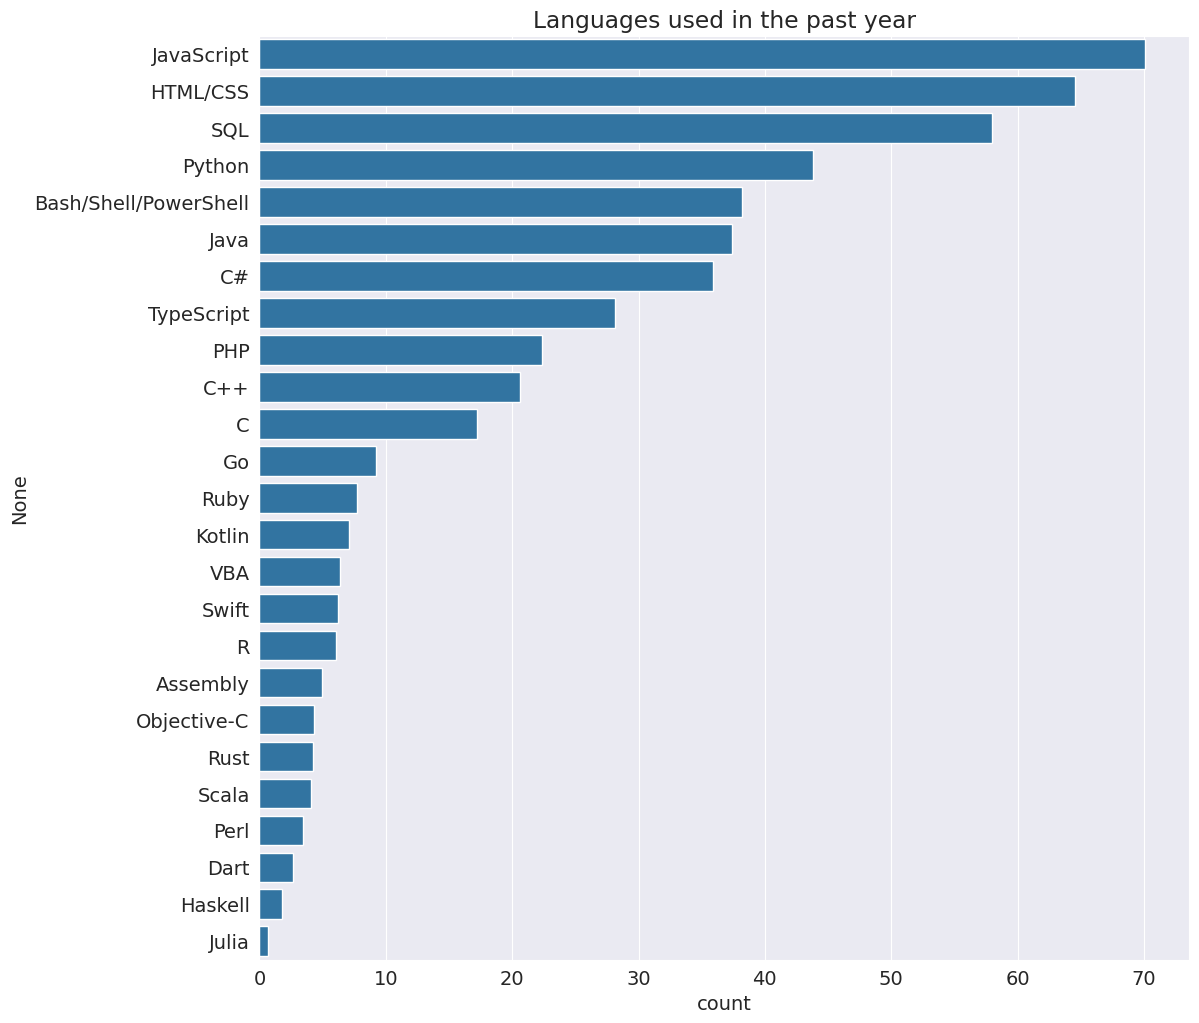

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x = languages_worked_percentages,y= languages_worked_percentages.index)
plt.title("Languages used in the past year");
plt.xlabel('count');


**Understanding from the data analysis:** JavaScript and HTML/CSS dominate as the most sought-after web development skills today, thanks to their accessibility. SQL remains essential for managing relational databases, making it a staple for many programmers. Meanwhile, Python has overtaken Java—which led server and application development for over two decades—as the preferred language for various development tasks.

Q: Which languages are the most people interested to learn over the next year?

In [ ]:
languages_interested_df = split_multicolumn(survey_df.LanguageDesireNextYear)
languages_interested_percentages = languages_interested_df.mean().sort_values(ascending=False) * 100
languages_interested_percentages

,0
JavaScript,45.852236
Python,43.907971
HTML/CSS,38.139987
SQL,37.524303
TypeScript,31.691510
C#,28.515878
Bash/Shell/PowerShell,22.715489
Go,20.771225
Java,20.317563
Rust,18.794556


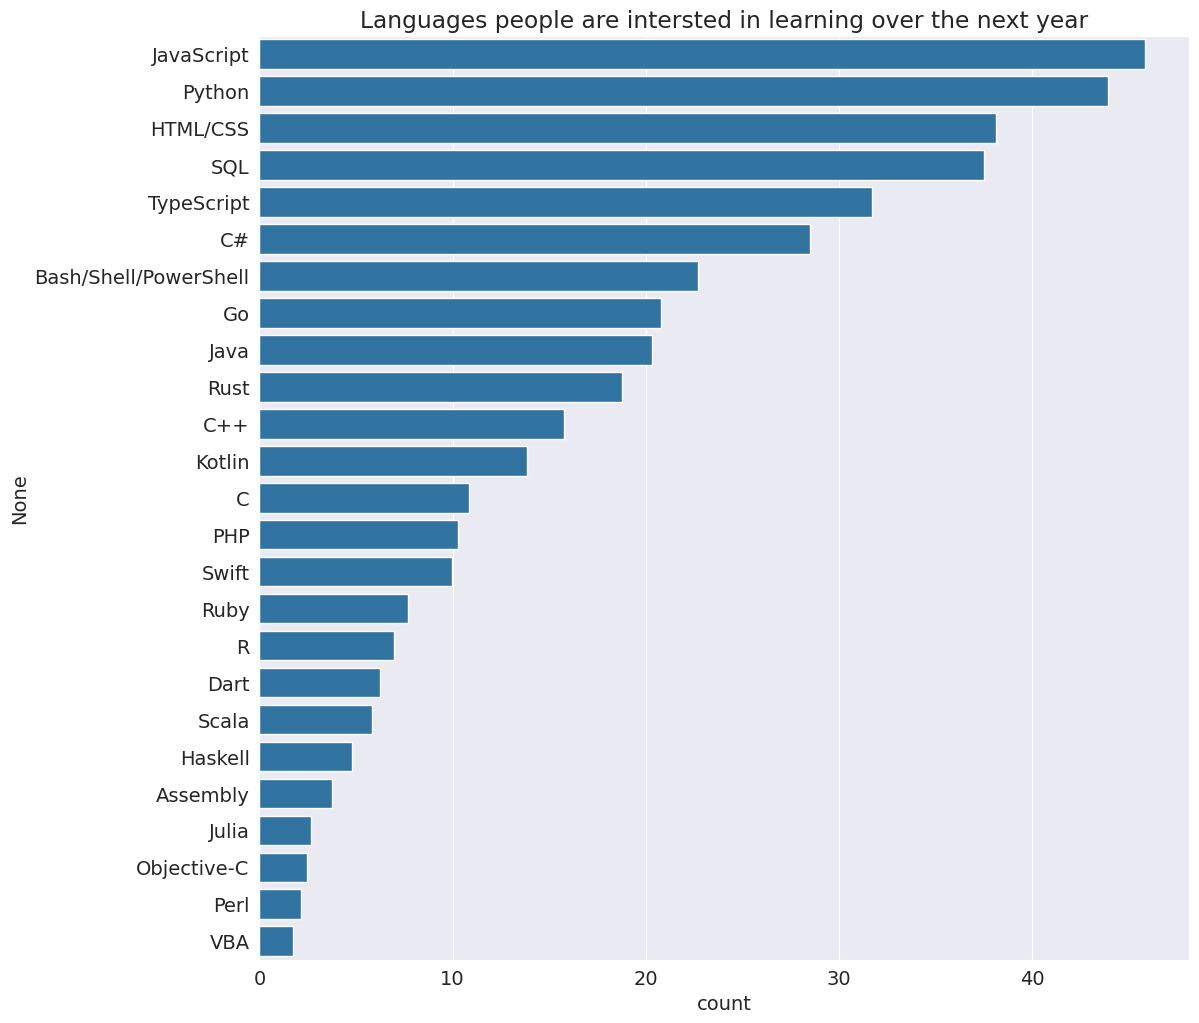

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x = languages_interested_percentages, y = languages_interested_percentages.index)
plt.title("Languages people are intersted in learning over the next year");
plt.xlabel('count');

**Observation:**
It's no wonder that Python captivates aspiring programmers; its simplicity and versatility make it an ideal choice for various domains, including application development, numerical computing, data analysis, machine learning, big data, cloud automation, web scraping, and scripting.

Q: Which are the most loved languages i.e. a high percentage of people who have used the language want to continue learning & using it over the next year?
While this question may seem trick at first, it's really easy to solve using Pandas array operations!!

In [ ]:
languages_loved_df = languages_worked_df & languages_interested_df

In [ ]:
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

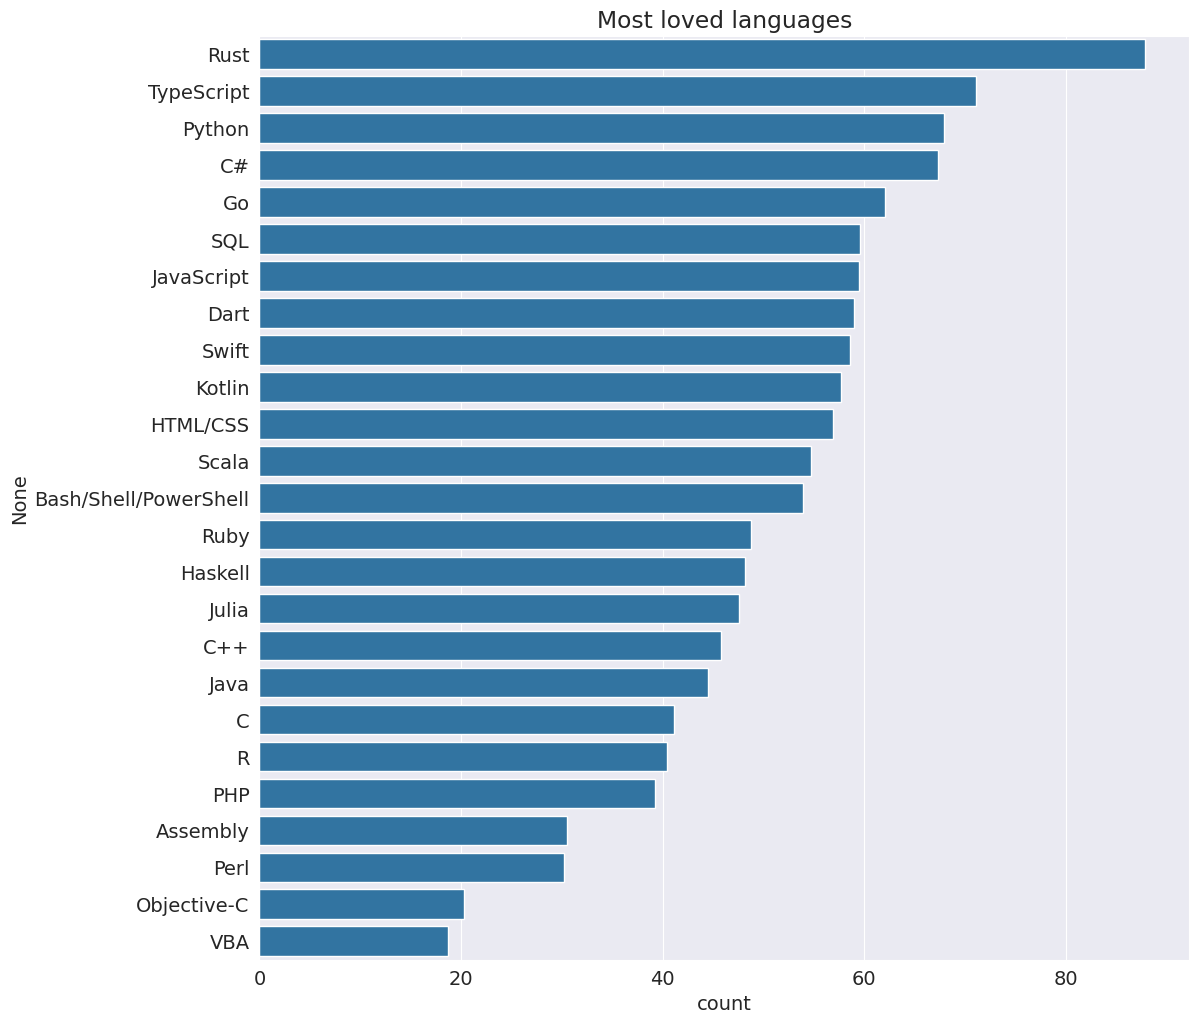

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(x= languages_loved_percentages, y = languages_loved_percentages.index)
plt.title("Most loved languages");
plt.xlabel('count');

OBSERVATIONS:
Rust has held the title of Stack Overflow's most admired language for eight consecutive years, reflecting its growing reputation among developers.
 Following closely is TypeScript, which has gained significant popularity as a robust alternative to JavaScript for web development. Python ranks third, despite its widespread use globally. This attests to its solid foundation, ease of learning and use, extensive ecosystem of libraries, and a vast, active community of developers who appreciate its versatility.

Q: In which countries do developers work the highest number of hours per week? Consider countries with more than 250 responses only.

In [ ]:
countries_df = survey_df.groupby('Country')[['WorkWeekHrs']].mean().sort_values('WorkWeekHrs', ascending=False)

In [ ]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts() > 250].head(15)

In [ ]:
high_response_countries_df

,WorkWeekHrs
Country,
United States,41.481583
Canada,39.181818


OBSERVATION: The Asian countries like Iran, China & Israel have the highest working hours, followed by the United States. However, there isn't too much variation overall and the average working hours seem to be around 40 hours per week.

Q: How important is it to start young to build a career in programming?

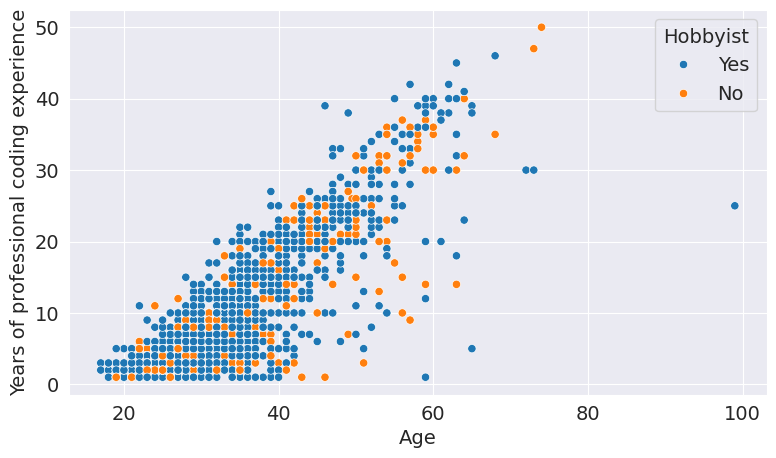

In [ ]:
sns.scatterplot(x= 'Age', y = 'YearsCodePro', hue='Hobbyist', data=survey_df)
plt.xlabel("Age")
plt.ylabel("Years of professional coding experience");

Observation: The graph is adorned with data points scattered across all age groups, illustrating that embarking on a professional programming journey is feasible at any stage of life. Notably, many seasoned professionals with decades of coding experience continue to indulge in programming as a cherished hobby.

To delve deeper, examining the distribution of the 'Age1stCode' column reveals the ages at which respondents first ventured into programming, offering further insights into these trends.

<ipython-input-58-a6c092805651>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(survey_df.Age1stCode);


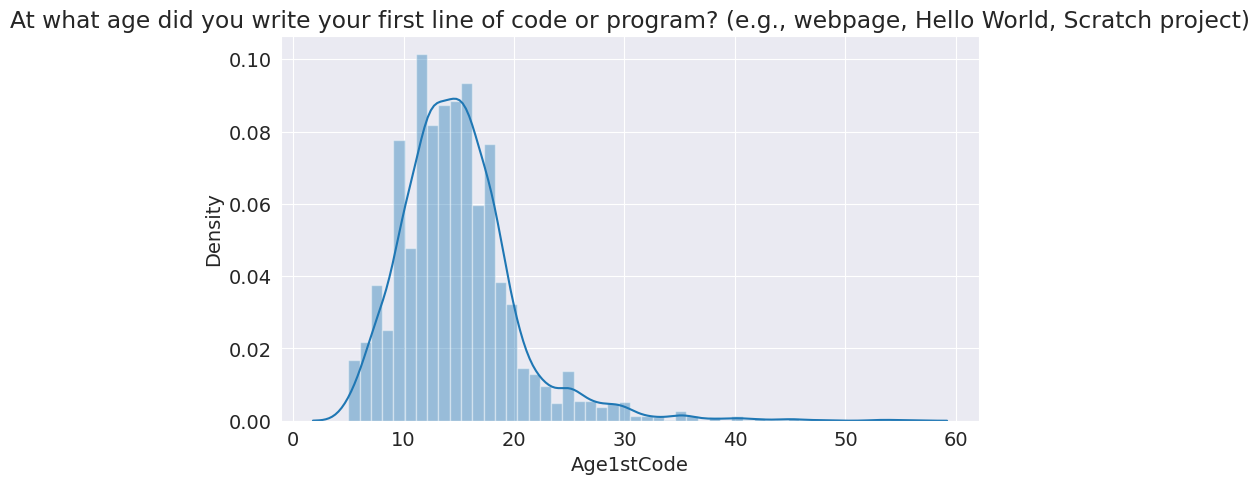

In [ ]:
plt.title(schema.Age1stCode)
sns.distplot(survey_df.Age1stCode);

**Inferences and Conclusions**  

The survey has yielded fascinating insights into the programming community. Here’s a summary of the key takeaways:  

- **Representation of the Programming Community**  
  The survey provides a reasonable glimpse into the global programming landscape. However, it underrepresents non-English-speaking countries and women or non-binary genders.  

- **Diversity in Programming**  
  While progress has been made, the programming community remains less diverse than it could be. Greater efforts are needed to support and uplift underrepresented groups—across dimensions such as age, nationality, race, gender, and more.  

- **Educational Backgrounds**  
  A majority of programmers hold college degrees, though many did not major in computer science. This highlights that formal computer science training is not essential to learn programming or build a successful career in the field.  

- **Career Pathways**  
  Many programmers pursue freelancing or part-time roles, offering a practical entry point into the field—especially for newcomers.  

- **Popular Programming Languages**  
  JavaScript and HTML/CSS were the most widely used languages in 2020, followed closely by SQL and Python.  

- **Python’s Popularity**  
  Python stands out as the most desired language to learn, thanks to its simplicity and versatility across domains like application development, data analysis, machine learning, and more.  

- **Most-Loved Languages**  
  Rust and TypeScript topped the "most-loved" languages in 2020, with fast-growing, passionate communities. Python, despite its established prominence, remains close behind.  

- **Work Hours**  
  Programmers globally tend to work around 40 hours a week, with slight variations depending on the country.  

- **A Lifelong Career**  
  Programming welcomes learners at any age. With passion and practice, it can lead to a long, fulfilling career—especially when pursued as both a profession and a hobby.  